<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Чтобы разбиение на train/test было воспроизводимым и мы могли сравнивать качества моделей, которые мы обучаем`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [294]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [295]:
#Отобразите 10 случайных строк тренировочного датасета
random_rows = df_train.sample(n=10)
random_rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [296]:
#Отобразите первые 5 и последние 5 объектов тестового датасета
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [297]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [298]:
#Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
print(df_train.isnull().any().any())

True


In [299]:
df_train.columns[df_train.isnull().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [300]:
#Посмотрите, есть ли в данных явные дубликаты
df_train.duplicated().any()

True

In [301]:
# !pip install ydata_profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_train, title="Profiling Report")
# profile.to_widgets()

In [302]:
# profile.to_file('profiling_report.html')

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [303]:
torque_column = df_train['torque']
torque_column

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,22.4 kgm at 1750-2750rpm
3,"11.5@ 4,500(kgm@ rpm)"
4,113.75nm@ 4000rpm
...,...
6994,113.7Nm@ 4000rpm
6995,"24@ 1,900-2,750(kgm@ rpm)"
6996,190Nm@ 2000rpm
6997,140Nm@ 1800-3000rpm


In [304]:
import re
# перед тем, как заполнять медианой, обработаем столбцы так, чтобы в них содержались числовые значения
#torque
def handle_torgue(line):
  if not line:
    return {}
  line = str(line)
  pattern = r'(\d+\.?\d*)\s*([a-zA-Z]+)' #извлекаем числа и единицы измерения
  parsed_data = {}
  matches = re.findall(pattern, line)
  for value, unit in matches:
    parsed_data[unit.lower()] = value #lower тк данные по-разному записаны, где-то капсом, где-то строками
  return parsed_data

parsed_results = df_train['torque'].apply(handle_torgue)
parsed_results_df_test = df_test['torque'].apply(handle_torgue)

In [305]:
parsed_results
#размерность сохранилась, значит функцию парсинга верно сделали

,torque
0,"{'nm': '190', 'rpm': '2000'}"
1,"{'nm': '250', 'rpm': '2500'}"
2,"{'kgm': '22.4', 'rpm': '2750'}"
3,{}
4,"{'nm': '113.75', 'rpm': '4000'}"
...,...
6994,"{'nm': '113.7', 'rpm': '4000'}"
6995,{}
6996,"{'nm': '190', 'rpm': '2000'}"
6997,"{'nm': '140', 'rpm': '3000'}"


In [306]:
parsed_results_df_test

,torque
0,"{'nm': '260', 'rpm': '2200'}"
1,"{'nm': '260', 'rpm': '2750'}"
2,"{'nm': '172', 'rpm': '4300'}"
3,"{'nm': '200', 'rpm': '1750'}"
4,"{'nm': '96', 'rpm': '3000'}"
...,...
995,"{'nm': '99.04', 'rpm': '4500'}"
996,"{'nm': '114.7', 'rpm': '4000'}"
997,"{'kgm': '22.4', 'rpm': '2750'}"
998,"{'nm': '111.8', 'rpm': '4000'}"


In [307]:
parsed_df = pd.DataFrame(parsed_results.tolist())
parsed_df

,nm,rpm,kgm
0,190,2000,NaN
1,250,2500,NaN
2,NaN,2750,22.4
3,NaN,NaN,NaN
4,113.75,4000,NaN
...,...,...,...
6994,113.7,4000,NaN
6995,NaN,NaN,NaN
6996,190,2000,NaN
6997,140,3000,NaN


In [308]:
parsed_df_test = pd.DataFrame(parsed_results_df_test.tolist())
parsed_df_test

,nm,rpm,kgm
0,260,2200,NaN
1,260,2750,NaN
2,172,4300,NaN
3,200,1750,NaN
4,96,3000,NaN
...,...,...,...
995,99.04,4500,NaN
996,114.7,4000,NaN
997,NaN,2750,22.4
998,111.8,4000,NaN


In [309]:
parsed_df['kgm'].nunique()
parsed_df['kgm'].dropna().shape[0]
#очень мало заполненных значений - предлагаю не использовать данный столбец

97

In [310]:
parsed_df = parsed_df.drop('kgm', axis=1)
parsed_df

,nm,rpm
0,190,2000
1,250,2500
2,NaN,2750
3,NaN,NaN
4,113.75,4000
...,...,...
6994,113.7,4000
6995,NaN,NaN
6996,190,2000
6997,140,3000


In [311]:
parsed_df_test = parsed_df_test.drop('kgm', axis=1)

In [312]:
parsed_df_test

,nm,rpm
0,260,2200
1,260,2750
2,172,4300
3,200,1750
4,96,3000
...,...,...
995,99.04,4500
996,114.7,4000
997,NaN,2750
998,111.8,4000


In [313]:
parsed_df['rpm'].dropna().shape[0]
#имеет смысл оставить

6414

In [314]:
parsed_df['nm'].dropna().shape[0]
#имеет смысл оставить

6348

In [315]:
df_train[['mileage', 'engine', 'max_power', 'seats']]

,mileage,engine,max_power,seats
0,23.4 kmpl,1248 CC,74 bhp,5.0
1,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,23.0 kmpl,1396 CC,90 bhp,5.0
3,16.1 kmpl,1298 CC,88.2 bhp,5.0
4,20.14 kmpl,1197 CC,81.86 bhp,5.0
...,...,...,...,...
6994,18.5 kmpl,1197 CC,82.85 bhp,5.0
6995,16.8 kmpl,1493 CC,110 bhp,5.0
6996,19.3 kmpl,1248 CC,73.9 bhp,5.0
6997,23.57 kmpl,1396 CC,70 bhp,5.0


In [316]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [317]:
#отфильтруем в df_train [mileage,engine,max_power]столбцы и преобразуем в float тип
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(re.findall(r'\d+\.?\d*', str(x))[0]) if pd.notnull(x) else None)
df_train['engine'] = df_train['engine'].apply(lambda x: float(re.findall(r'\d+\.?\d*', str(x))[0]) if pd.notnull(x) else None)
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(re.findall(r'\d+\.?\d*', str(x))[0]) if pd.notnull(x) and re.findall(r'\d+\.?\d*', str(x)) else None) # добавил условие чтобы строка содержала число, иначе None

In [318]:
# df_train['mileage_units'].unique()

In [319]:
# отфильтруем df_test [mileage,engine,max_power] столбцы и преобразуем в float тип
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(re.findall(r'\d+\.?\d*', str(x))[0]) if pd.notnull(x) else None)
df_test['engine'] = df_test['engine'].apply(lambda x: float(re.findall(r'\d+\.?\d*', str(x))[0]) if pd.notnull(x) else None)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(re.findall(r'\d+\.?\d*', str(x))[0]) if pd.notnull(x) and re.findall(r'\d+\.?\d*', str(x)) else None)

In [320]:
df_train['seats'].unique()
#seats оставляем как есть

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [321]:
df_train = pd.concat([df_train, parsed_df], axis=1)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,nm,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250,2500
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,NaN,2750
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,NaN,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,113.75,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,113.7,4000
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,NaN,NaN
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0,190,2000
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,140,3000


In [322]:
df_test = pd.concat([df_test, parsed_df_test], axis=1)
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,nm,rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260 Nm at 1800-2200 rpm,7.0,260,2200
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0,260,2750
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172Nm@ 4300rpm,5.0,172,4300
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200Nm@ 1750rpm,5.0,200,1750
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96 Nm at 3000 rpm,5.0,96,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04Nm@ 4500rpm,5.0,99.04,4500
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0,114.7,4000
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,NaN,2750
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.8Nm@ 4000rpm,5.0,111.8,4000


In [323]:
df_train = df_train.drop(['torque'], axis=1)
df_test = df_test.drop(['torque'], axis=1)

In [324]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,nm,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250,2500
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,NaN,2750
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,NaN,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,113.7,4000
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,NaN,NaN
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,190,2000
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,140,3000


In [325]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   float64
 9   engine         6797 non-null   float64
 10  max_power      6802 non-null   float64
 11  seats          6797 non-null   float64
 12  nm             6348 non-null   object 
 13  rpm            6414 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 765.6+ KB


In [326]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,nm,rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0,260,2200
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0,260,2750
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0,172,4300
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0,200,1750
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0,96,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0,99.04,4500
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0,114.7,4000
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,NaN,2750
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0,111.8,4000


In [327]:
columns_to_convert = ['nm', 'rpm']

df_train[columns_to_convert] = df_train[columns_to_convert].apply(lambda col: pd.to_numeric(col, errors='coerce')) #преобразуем в числовой тип np и rpm
df_test[columns_to_convert] = df_test[columns_to_convert].apply(lambda col: pd.to_numeric(col, errors='coerce')) #преобразуем в числовой тип np и rpm

In [328]:
from sklearn.impute import SimpleImputer
cat_features_mask = (df_train.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = df_train[df_train.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="median")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

In [329]:
df_train[X_no_mis_real.columns] =X_no_mis_real
fcols = df_train.select_dtypes('float').columns
icols = df_train.select_dtypes('integer').columns

df_train[fcols] = df_train[fcols].apply(pd.to_numeric, downcast='float')
df_train[icols] = df_train[icols].apply(pd.to_numeric, downcast='integer')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   float32
 2   selling_price  6999 non-null   float32
 3   km_driven      6999 non-null   float32
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6999 non-null   float32
 9   engine         6999 non-null   float32
 10  max_power      6999 non-null   float32
 11  seats          6999 non-null   float32
 12  nm             6999 non-null   float32
 13  rpm            6999 non-null   float32
dtypes: float32(9), object(5)
memory usage: 519.6+ KB


In [330]:
X_real_test = df_test[df_train.columns[~cat_features_mask]]
X_no_mis_real_test = pd.DataFrame(data=mis_replacer.transform(X_real_test), columns=X_real_test.columns) #не применяем fit

In [331]:
df_test[X_no_mis_real_test.columns] = X_no_mis_real_test

In [332]:
fcols = df_test.select_dtypes('float').columns
icols = df_test.select_dtypes('integer').columns

df_test[fcols] = df_test[fcols].apply(pd.to_numeric, downcast='float')
df_test[icols] = df_test[icols].apply(pd.to_numeric, downcast='integer')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   float32
 2   selling_price  1000 non-null   float32
 3   km_driven      1000 non-null   float32
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float32
 9   engine         1000 non-null   float32
 10  max_power      1000 non-null   float32
 11  seats          1000 non-null   float32
 12  nm             1000 non-null   float32
 13  rpm            1000 non-null   float32
dtypes: float32(9), object(5)
memory usage: 74.3+ KB


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [333]:
Xtrain = df_train.drop(columns=['selling_price'])
ytrain = df_train['selling_price']

In [334]:
Xtrain.duplicated().any()

True

In [335]:
Xtrain.duplicated().sum() #кол-во объектов с одинаковым признаковым описанием

1159

In [336]:
duplicates = Xtrain[Xtrain.duplicated()]
duplicates #объекты с одинаковым признаковым описанием

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,nm,rpm
254,Hyundai Grand i10 Sportz,2017.0,35000.0,Petrol,Individual,Manual,First Owner,18.900000,1197.0,82.000000,5.0,114.000000,4000.0
258,Maruti Swift VXI,2012.0,50000.0,Petrol,Individual,Manual,Second Owner,18.600000,1197.0,85.800003,5.0,114.000000,4000.0
268,Maruti Swift Dzire VXI,2014.0,70000.0,Petrol,Individual,Manual,Second Owner,19.100000,1197.0,85.800003,5.0,114.000000,4000.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017.0,9000.0,Diesel,Dealer,Automatic,First Owner,13.600000,1999.0,177.000000,5.0,430.000000,2500.0
325,Lexus ES 300h,2019.0,20000.0,Petrol,Dealer,Automatic,First Owner,22.370001,2487.0,214.559998,5.0,202.000000,5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010.0,60000.0,Petrol,Individual,Manual,Second Owner,18.000000,995.0,62.000000,5.0,90.300003,4200.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018.0,24000.0,Diesel,Individual,Manual,First Owner,24.400000,1498.0,98.629997,5.0,215.000000,3000.0
6989,Maruti Swift Dzire VDI,2015.0,50000.0,Diesel,Individual,Manual,First Owner,26.590000,1248.0,74.000000,5.0,190.000000,2000.0
6997,Tata Indigo CR4,2013.0,25000.0,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,5.0,140.000000,3000.0


In [337]:
#Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю
df_train = df_train.drop(index=duplicates.index) # duplicated() в pandas по умолчанию помечает только последующие дубликаты после первых строк, поэтому можем взять просто индексы из duplicates

In [338]:
df_train = df_train.reset_index(drop=True) #обновляем индексы

In [339]:
ytrain = df_train['selling_price']
df_train = df_train.drop('selling_price',axis=1) #удаляем столбец с целевой перменной
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,nm,rpm
0,Maruti Swift Dzire VDI,2014.0,145500.0,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,120000.0,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,5.0,250.000000,2500.0
2,Hyundai i20 Sportz Diesel,2010.0,127000.0,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,5.0,171.000000,2750.0
3,Maruti Swift VXI BSIII,2007.0,120000.0,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,5.0,171.000000,3000.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,45000.0,Petrol,Individual,Manual,First Owner,20.139999,1197.0,81.860001,5.0,113.750000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008.0,191000.0,Petrol,Individual,Manual,First Owner,17.920000,1086.0,62.099998,5.0,96.099998,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013.0,50000.0,Petrol,Individual,Manual,Second Owner,18.900000,998.0,67.099998,5.0,90.000000,3500.0
5837,Hyundai i20 Magna,2013.0,110000.0,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,5.0,113.699997,4000.0
5838,Hyundai Verna CRDi SX,2007.0,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,5.0,171.000000,3000.0


In [340]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [341]:
#сделал все действия выше в ячейках 11,26,27,32, torgue обработан
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5840 non-null   object 
 1   year          5840 non-null   float32
 2   km_driven     5840 non-null   float32
 3   fuel          5840 non-null   object 
 4   seller_type   5840 non-null   object 
 5   transmission  5840 non-null   object 
 6   owner         5840 non-null   object 
 7   mileage       5840 non-null   float32
 8   engine        5840 non-null   float32
 9   max_power     5840 non-null   float32
 10  seats         5840 non-null   float32
 11  nm            5840 non-null   float32
 12  rpm           5840 non-null   float32
dtypes: float32(8), object(5)
memory usage: 410.8+ KB


In [342]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   float32
 2   selling_price  1000 non-null   float32
 3   km_driven      1000 non-null   float32
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float32
 9   engine         1000 non-null   float32
 10  max_power      1000 non-null   float32
 11  seats          1000 non-null   float32
 12  nm             1000 non-null   float32
 13  rpm            1000 non-null   float32
dtypes: float32(9), object(5)
memory usage: 74.3+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [343]:
# преобразуем df_train
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
# преобразуем df_test
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5840 non-null   object 
 1   year          5840 non-null   float32
 2   km_driven     5840 non-null   float32
 3   fuel          5840 non-null   object 
 4   seller_type   5840 non-null   object 
 5   transmission  5840 non-null   object 
 6   owner         5840 non-null   object 
 7   mileage       5840 non-null   float32
 8   engine        5840 non-null   int64  
 9   max_power     5840 non-null   float32
 10  seats         5840 non-null   int64  
 11  nm            5840 non-null   float32
 12  rpm           5840 non-null   float32
dtypes: float32(6), int64(2), object(5)
memory usage: 456.4+ KB


In [344]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   float32
 2   selling_price  1000 non-null   float32
 3   km_driven      1000 non-null   float32
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float32
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float32
 11  seats          1000 non-null   int64  
 12  nm             1000 non-null   float32
 13  rpm            1000 non-null   float32
dtypes: float32(7), int64(2), object(5)
memory usage: 82.2+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [345]:
# основные статистики по числовым столбцам для трейна
df_train.select_dtypes(include='number').describe()

,year,km_driven,mileage,engine,max_power,seats,nm,rpm
count,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428467,7.395224e+04,19.428612,1429.448973,87.910774,5.426712,172.389664,3022.227295
std,4.095586,6.007109e+04,3.986024,485.662834,31.639635,0.982344,82.179474,883.713196
min,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,2.000000,51.000000,0.000000
25%,2011.000000,3.900000e+04,16.950001,1197.000000,68.000000,5.000000,113.000000,2400.000000
50%,2014.000000,7.000000e+04,19.299999,1248.000000,81.860001,5.000000,171.000000,3000.000000
75%,2017.000000,1.000000e+05,22.299999,1498.000000,99.000000,5.000000,200.000000,3750.000000
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,789.000000,5300.000000


In [346]:
# основные статистики по числовым столбцам для теста
df_test.select_dtypes(include='number').describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,nm,rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681030,6.179011e+05,71393.335938,19.337481,1454.87600,90.844330,5.403000,175.394608,3051.095947
std,4.012144,7.585542e+05,48486.203125,3.951751,521.99574,34.892735,0.912921,87.425285,901.342102
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200001,4.000000,48.000000,0.000000
25%,2011.000000,2.500000e+05,37000.000000,16.549999,1197.00000,69.000000,5.000000,111.950001,2500.000000
50%,2014.000000,4.349990e+05,61500.000000,19.299999,1248.00000,82.424999,5.000000,171.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.299999,1582.00000,102.000000,5.000000,200.500000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.259998,3604.00000,280.000000,9.000000,620.000000,5200.000000


In [347]:
# основные статистики по категориальным столбцам для трейна
df_train.select_dtypes(include='object').describe()

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [348]:
# основные статистики по категориальным столбцам для теста
df_test.select_dtypes(include='object').describe()

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [349]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

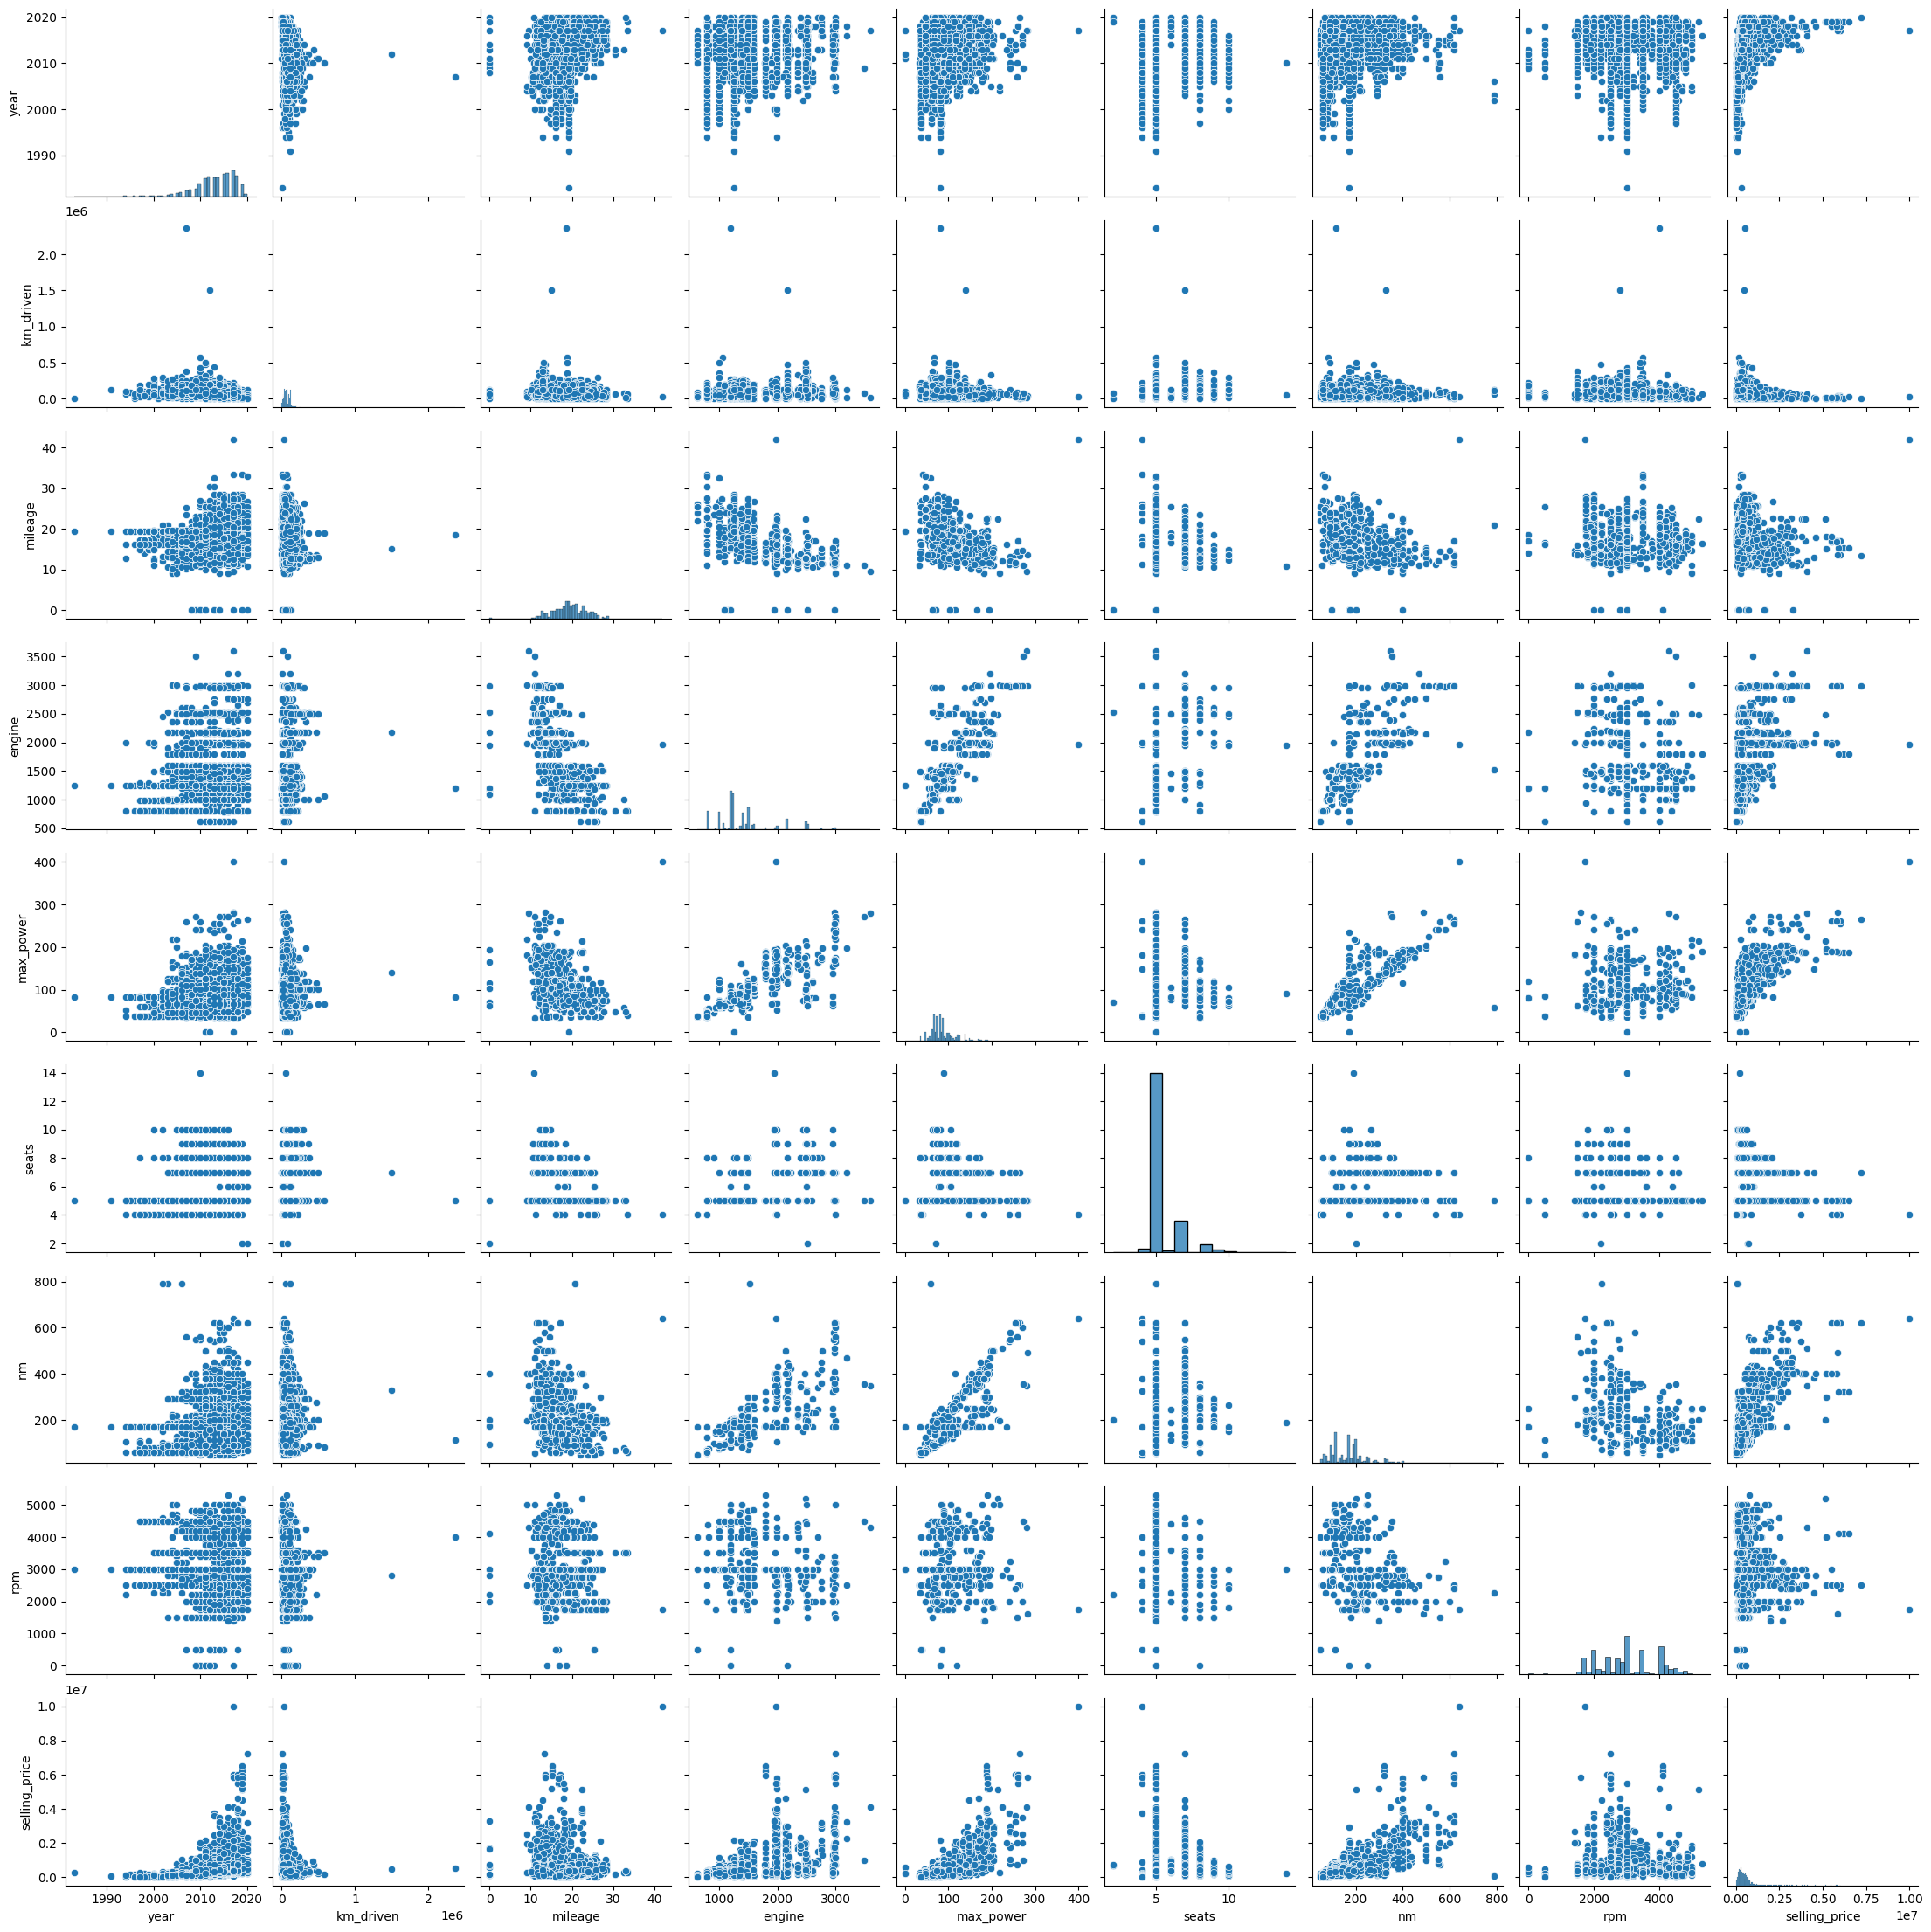

In [350]:
df_train_number_features = df_train.select_dtypes(include='number')
df_train_number_features_and_y = pd.concat([df_train_number_features, ytrain], axis=1) #соединяем с вектором целевой переменной, чтобы увидеть зависимости с ценой
sns.pairplot(df_train_number_features_and_y)
plt.show()

In [351]:
#Можно ли предположить на основе распределений связь признаков с целевой переменной?
"""Да, у некоторых признаков есть зависимость - чем больше год, тем более вероятно будет дороже цена
 обратная ситуация с пробегом (ниже пробег, выше цена)
 в mileage не вижу явной зависимости
 engine, max_power, nm есть зависимость
 у seats нет зависимости с price
 у rpm не вижу явной зависимости"""
#Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
"""Да, engine/max_power коррелируют
  также engine/nm, max_power/nm
"""

'Да, engine/max_power коррелируют \n  также engine/nm, max_power/nm\n'

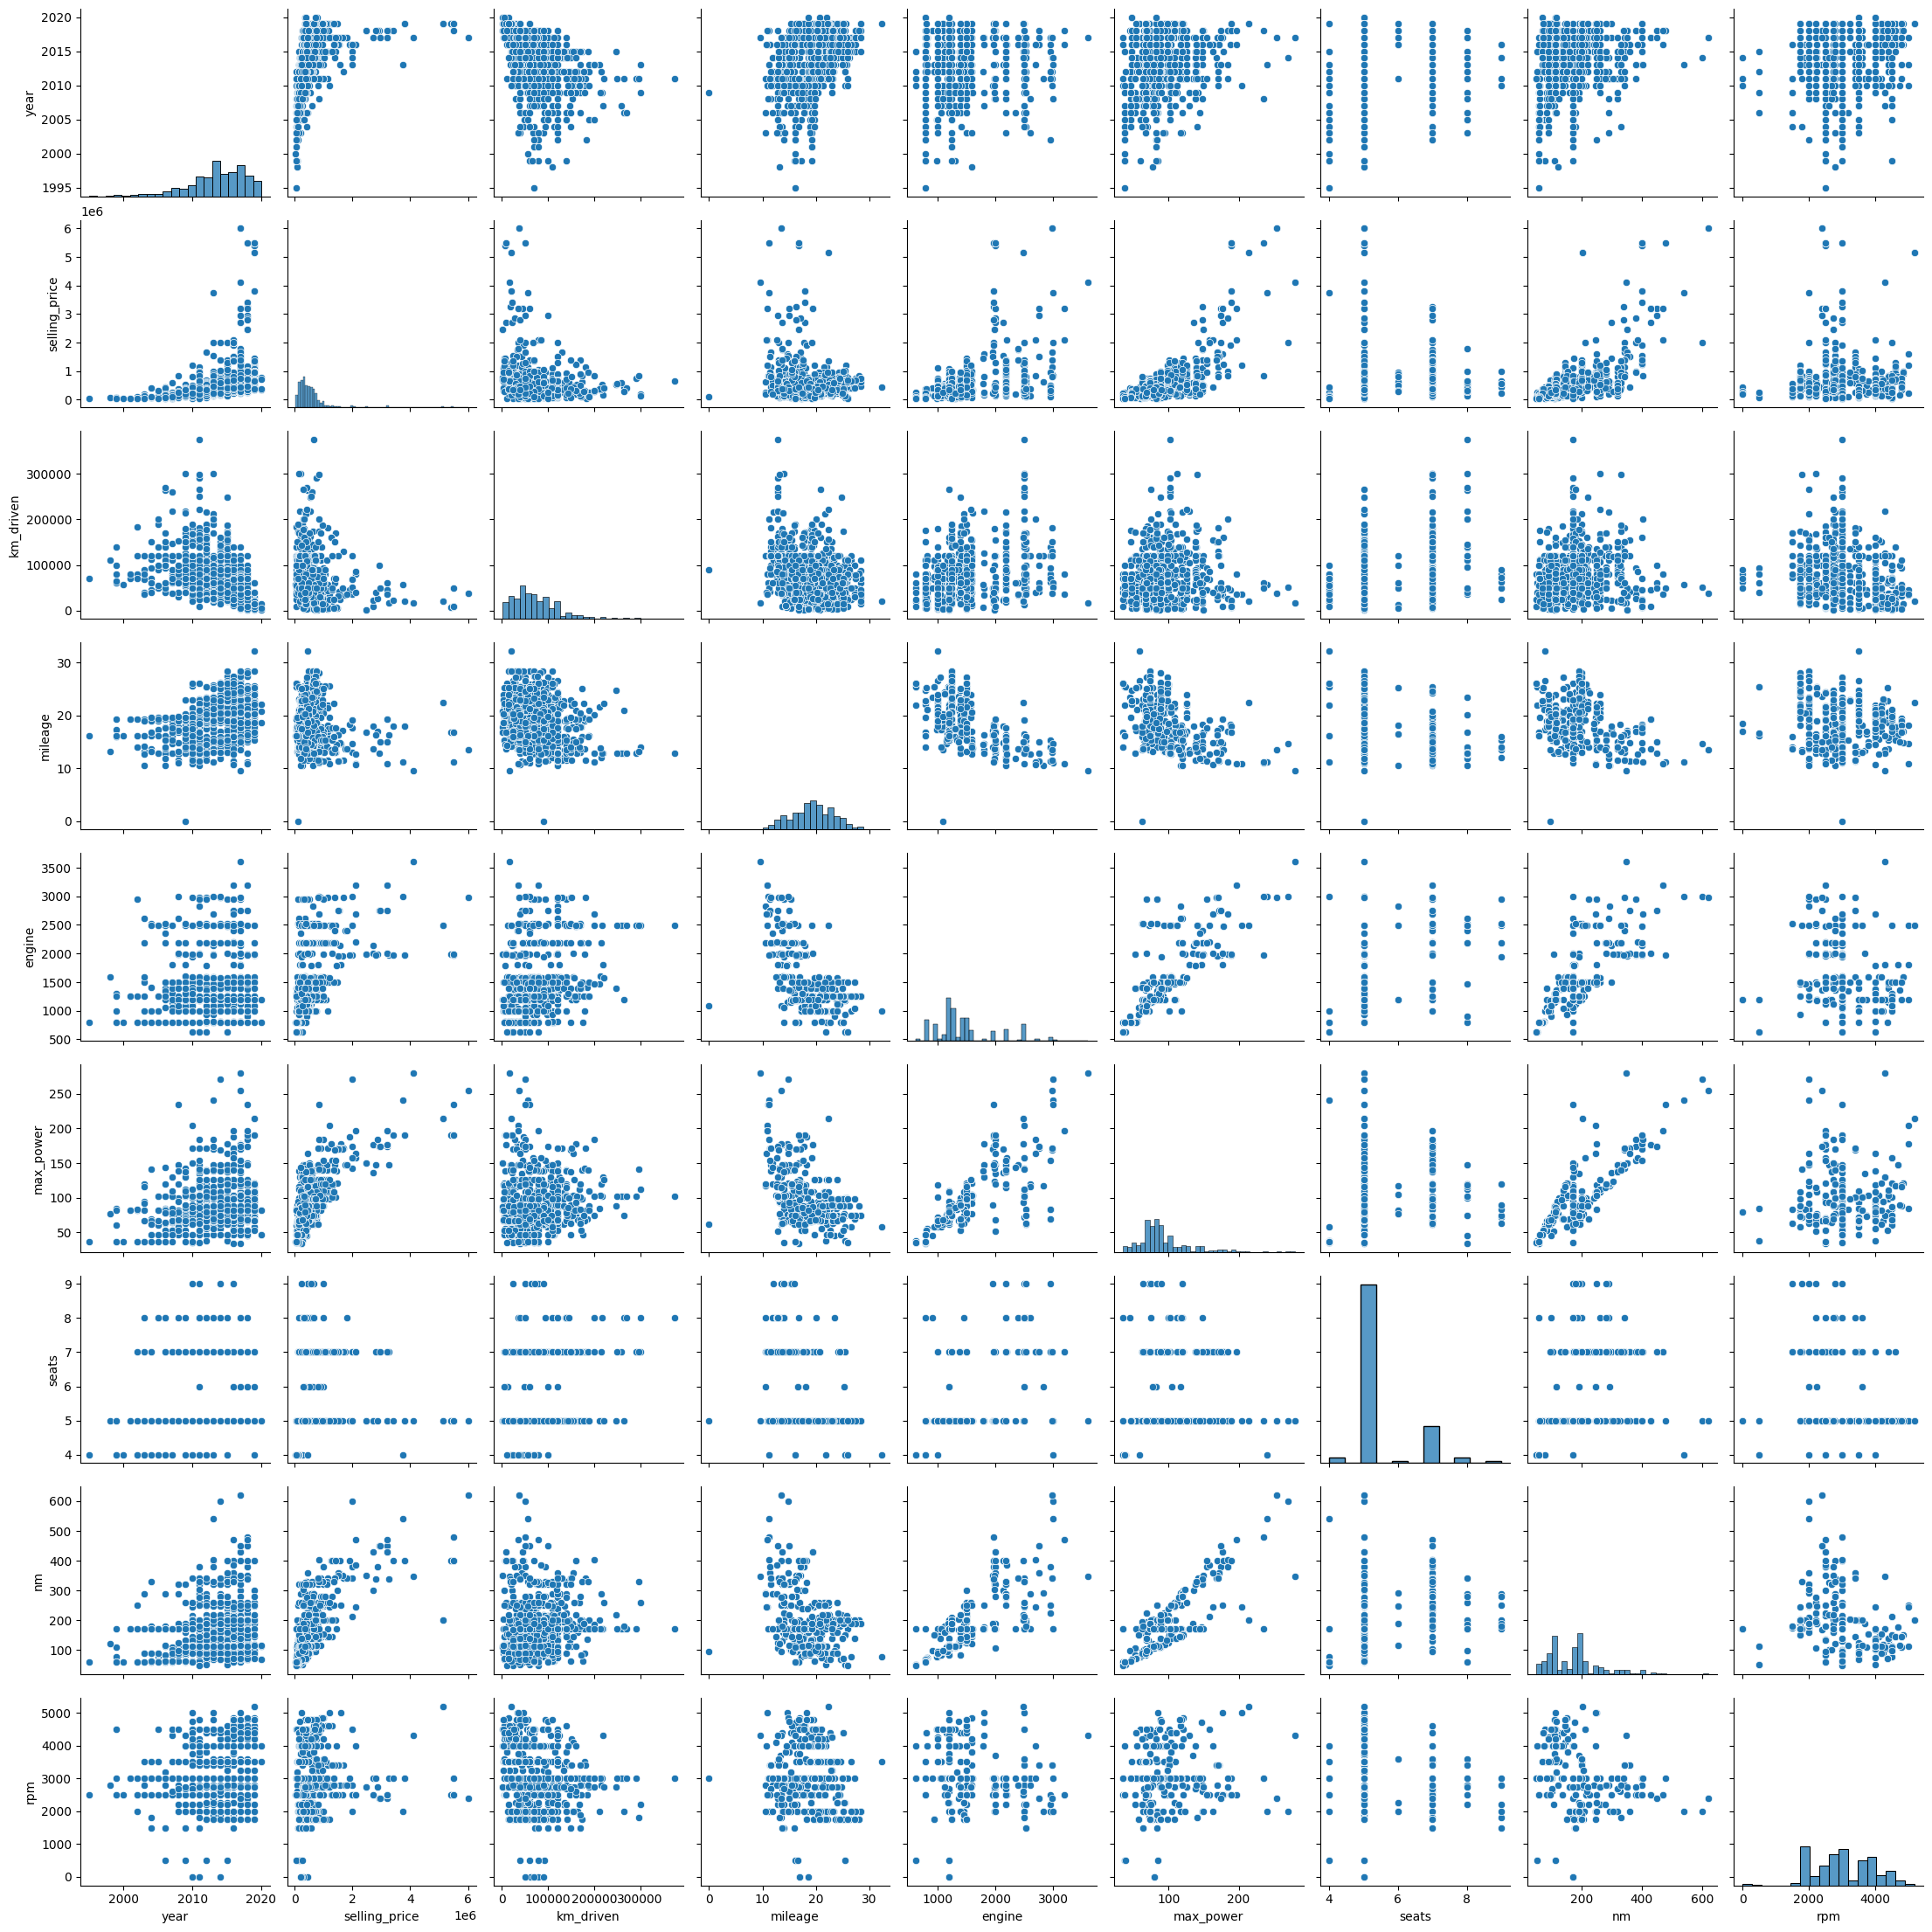

In [352]:
"""Шаг 2.
- [ ] Постройте pairplot по тестовым данным"""
number_features = df_test.select_dtypes(include='number')
sns.pairplot(number_features)
plt.show()

`Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?`
* Да, тут также коррелируют с ценой те же признаки, что и для train выше
* Также те же пары признаков коррелируют между собой



### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [353]:
correlation_matrix = df_train_number_features_and_y.corr()
correlation_matrix

,year,km_driven,mileage,engine,max_power,seats,nm,rpm,selling_price
year,1.000000,-0.368966,0.342172,0.002819,0.156648,0.041178,0.110689,0.069208,0.427279
km_driven,-0.368966,1.000000,-0.182245,0.229766,0.024630,0.192328,0.130368,-0.211219,-0.164828
mileage,0.342172,-0.182245,1.000000,-0.572677,-0.373271,-0.450810,-0.249951,-0.170613,-0.104458
engine,0.002819,0.229766,-0.572677,1.000000,0.681082,0.652172,0.723987,-0.239074,0.447672
max_power,0.156648,0.024630,-0.373271,0.681082,1.000000,0.244060,0.817992,-0.021871,0.692754
seats,0.041178,0.192328,-0.450810,0.652172,0.244060,1.000000,0.366620,-0.202774,0.149953
nm,0.110689,0.130368,-0.249951,0.723987,0.817992,0.366620,1.000000,-0.432184,0.615108
rpm,0.069208,-0.211219,-0.170613,-0.239074,-0.021871,-0.202774,-0.432184,1.000000,-0.078683
selling_price,0.427279,-0.164828,-0.104458,0.447672,0.692754,0.149953,0.615108,-0.078683,1.000000


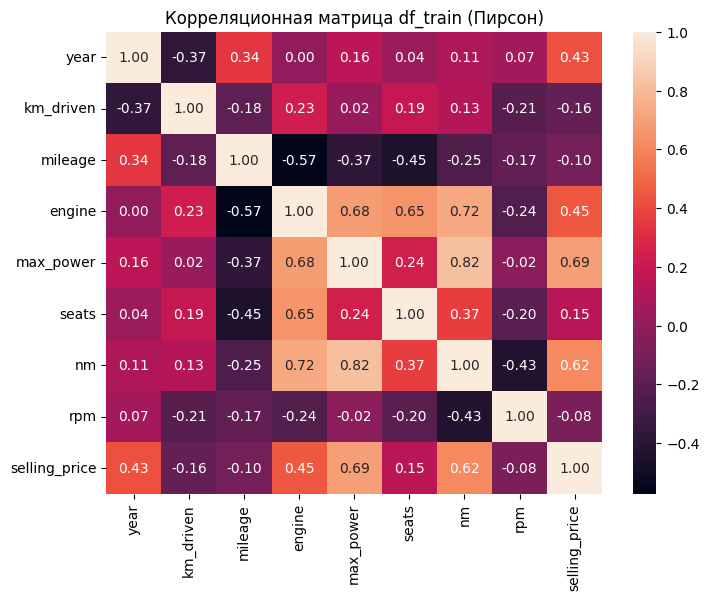

In [354]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Корреляционная матрица df_train (Пирсон)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?  
 ```Engine и Year```
 - Между какими наблюдается довольно сильная положительная линейная зависимость?  
 ```Положительная корреляция между Max_power/selling_price; nm/selling_price;```
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?  
 ```Коэффициент -0.37 указывает на слабую отрицательную линейную зависимость, поэтому не гарантировано, что при росте года падает пробег, поэтому я считаю это утверждение неверным```

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

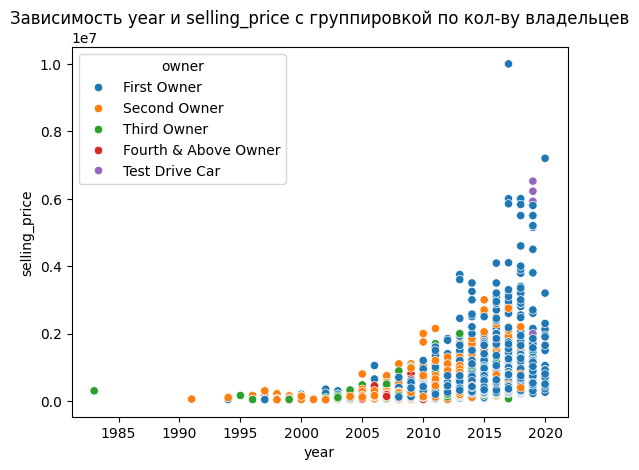

In [355]:
#Думаю, можно увидеть нелинейную зависимость между year & selling price, можно построить диаграму рассеяния.
df_train_and_y = pd.concat([df_train, ytrain], axis=1) #соединяем с вектором целевой переменной, чтобы увидеть зависимости с ценой
sns.scatterplot(data=df_train_and_y, x="year", y="selling_price", hue="owner")
plt.title("Зависимость year и selling_price c группировкой по кол-ву владельцев")
plt.show()

In [356]:
df_train_and_y.select_dtypes(include=["object"]).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

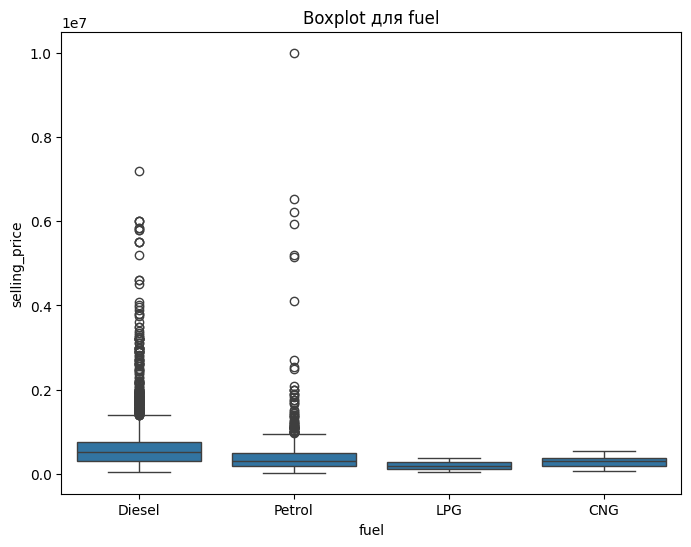

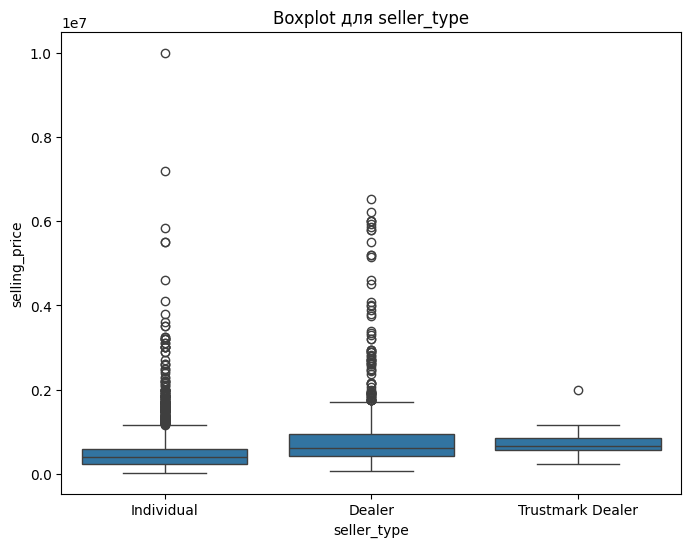

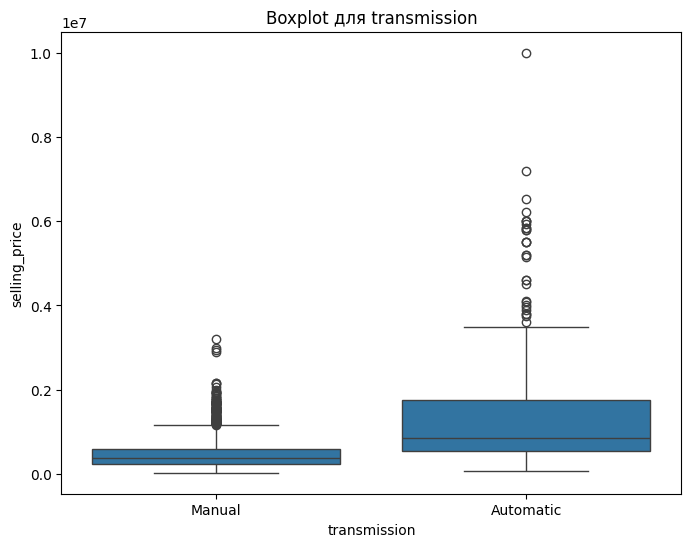

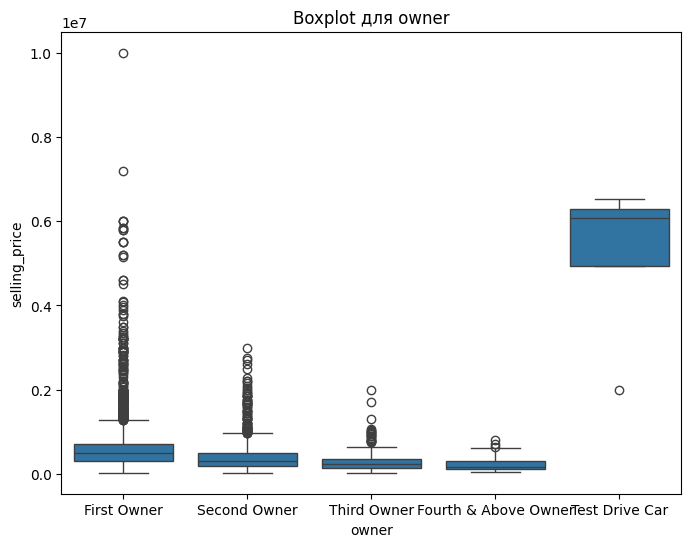

In [357]:
"""также, нет графиков, которые бы брали во внимание категории - вполне вероятно, что машина, которая была у 5 владельца
стоит дешевле чем у первого или второго, и механическая коробка дешевле автомата - можем отобразить это на boxplot"""
categorical_columns = df_train_and_y.select_dtypes(include=["object"]).drop(columns=['name']).columns
for column in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df_train_and_y, x=column, y="selling_price")
  plt.title(f"Boxplot для {column}")
  plt.xlabel(column)
  plt.ylabel("selling_price")
  plt.show()

In [358]:
"""из графиков выше видно, что тип коробки и номер владельца влияют на стоимость автомобиля, также гипотеза о том, как номер владельца авто влияет на цену, подтвердилась"""

'из графиков выше видно, что тип коробки и номер владельца влияют на стоимость автомобиля, также гипотеза о том, как номер владельца авто влияет на цену, подтвердилась'

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [359]:
train_dataframe_copy = df_train_and_y.copy()
train_dataframe_copy = train_dataframe_copy.select_dtypes(include=["number"])

In [360]:
y_train = train_dataframe_copy['selling_price']
X_train = train_dataframe_copy.drop('selling_price',axis=1)

In [361]:
#видимо данные из torque не ожидаются по заданию, тогда удалим их
X_train = X_train.drop(columns=["nm", "rpm"])
assert X_train.shape == (5840, 6)

In [362]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014.0,145500.0,23.400000,1248,74.000000,5
1,2014.0,120000.0,21.139999,1498,103.519997,5
2,2010.0,127000.0,23.000000,1396,90.000000,5
3,2007.0,120000.0,16.100000,1298,88.199997,5
4,2017.0,45000.0,20.139999,1197,81.860001,5
...,...,...,...,...,...,...
5835,2008.0,191000.0,17.920000,1086,62.099998,5
5836,2013.0,50000.0,18.900000,998,67.099998,5
5837,2013.0,110000.0,18.500000,1197,82.849998,5
5838,2007.0,119000.0,16.799999,1493,110.000000,5


In [363]:
test_dataframe_copy = df_test.copy()
test_dataframe_copy = test_dataframe_copy.select_dtypes(include='number').drop(columns=["nm", "rpm"])
y_test = test_dataframe_copy['selling_price']
X_test = test_dataframe_copy.drop('selling_price',axis=1)

In [364]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [365]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
LinearRegression_model = model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_LinearRegression = y_pred
mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 233297550632.1805
R^2 Score: 0.5941441176785935


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [366]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train)

X_test = scaler.transform(X_test) #применяем скейлер без обучения на тестовую выборку
X_test = pd.DataFrame(data=X_test)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_StandartScaler =y_pred
mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 233297550632.1757
R^2 Score: 0.594144117678602


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [367]:
model_coeffs = model.coef_

coeff_mapping = dict(zip(X_train.columns, model_coeffs))

print("Коэффициенты модели:")
for feature, coef in coeff_mapping.items():
    print(f"{feature}: {coef}")

#Предпоследний четвертый признак больше всего влияет на цену max_power

Коэффициенты модели:
0: 152843.26013949147
1: -44148.04838180958
2: 28781.09171225333
3: 61176.86517335465
4: 322779.69943529274
5: -23220.572032043725


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [368]:
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha=8500)
model_l1.fit(X_train, y_train)

y_pred = model_l1.predict(X_test)

mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 239618929436.22446
R^2 Score: 0.5831471365056193


In [369]:
model_coeffs = model_l1.coef_

coeff_mapping = dict(zip(X_train.columns, model_coeffs))

print("Коэффициенты модели:")
for feature, coef in coeff_mapping.items():
    print(f"{feature}: {coef}")

Коэффициенты модели:
0: 151369.67347861125
1: -34618.99173770783
2: 12870.756365076188
3: 21545.094344564972
4: 329662.2421651566
5: -0.0


```Какой бы коэффициент alpha ни взял, качество модели не улучшается.
При альфа 8500 коэффициент seats зануляется, предполагаю что при настройках по умолчанию и альфа =1 такого размера альфы не достаточно, чтобы добавлять такой
штраф к минимизации функции потерь, чтобы занулить коэффиценты модели, которые составляют десятки тысяч```

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [370]:
from sklearn.model_selection import GridSearchCV
model = Lasso()
param_grid = {'alpha': [10, 100, 1000, 10000, 100000], 'max_iter': [1000, 5000]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [10, 100, 1000, 10000, 100000],
                         'max_iter': [1000, 5000]},
             scoring='r2', verbose=1)

In [371]:
from sklearn.metrics import r2_score, mean_squared_error
# Модель с лучшими параметрами
best_model = grid.best_estimator_
Lasso_model = best_model
y_pred = best_model.predict(X_test)
y_pred_Lasso = y_pred
r2_test = r2_score(y_test, y_pred)
print("R^2 на тестовых данных:", r2_test)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE на тестовых данных:", mse_test)

R^2 на тестовых данных: 0.5815931419574425
MSE на тестовых данных: 240512209877.823


In [372]:
#Сколько грид-сёрчу пришлось обучать моделей?
len(grid.cv_results_['params'])
#пришлось обучать, если учитывать кол-во фолдов для каждой модели, 10*10 = 100

10

In [373]:
print(grid.best_params_['alpha']) # коэффициент регуляризации у лучшей из перебранных моделей
grid.best_estimator_.coef_ #Занулились ли какие-нибудь из весов при такой регуляризации?
#да, занулился последний столбец seats

10000


array([151898.11132568, -32723.30013526,   9238.17542723,  17841.94177932,
       329198.98663667,     -0.        ])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [374]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()
ElasticNet_model = model
param_grid = {'alpha': [10, 100, 1000, 10000, 100000], 'l1_ratio':[0,0.1, 0.3, 0.5, 0.7, 0.9],'max_iter': [1000, 5000]}
grid = GridSearchCV(estimator=model_elastic, param_grid=param_grid, scoring='r2', cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [10, 100, 1000, 10000, 100000],
                         'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9],
                         'max_iter': [1000, 5000]},
             scoring='r2', verbose=1)

In [375]:
#пришолсь обучать 5*6*2 = 60 моделей, с учетом 10 фолдов в каждом случае 600 моделей
print(grid.best_params_['alpha'])
print(grid.best_params_['l1_ratio'])

10
0.9


In [376]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_elasticNet = y_pred
r2_test = r2_score(y_test, y_pred)
print("R^2 на тестовых данных:", r2_test)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE на тестовых данных:", mse_test)

R^2 на тестовых данных: 0.41909112530447623
MSE на тестовых данных: 333923009398.782


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [377]:
X_train_cat = df_train_and_y.copy()
X_train_cat.drop(columns=['name','nm','rpm','selling_price'], axis=1, inplace=True)

In [378]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014.0,145500.0,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5
1,2014.0,120000.0,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5
2,2010.0,127000.0,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5
3,2007.0,120000.0,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5
4,2017.0,45000.0,Petrol,Individual,Manual,First Owner,20.139999,1197,81.860001,5
...,...,...,...,...,...,...,...,...,...,...
5835,2008.0,191000.0,Petrol,Individual,Manual,First Owner,17.920000,1086,62.099998,5
5836,2013.0,50000.0,Petrol,Individual,Manual,Second Owner,18.900000,998,67.099998,5
5837,2013.0,110000.0,Petrol,Individual,Manual,First Owner,18.500000,1197,82.849998,5
5838,2007.0,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493,110.000000,5


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [379]:
assert X_train_cat.shape == (5840, 10)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [380]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

df_encoded = pd.get_dummies(X_train_cat, columns=['fuel','seller_type','transmission','owner'], drop_first=True)
df_encoded

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014.0,145500.0,23.400000,1248,74.000000,5,True,False,False,True,False,True,False,False,False,False
1,2014.0,120000.0,21.139999,1498,103.519997,5,True,False,False,True,False,True,False,True,False,False
2,2010.0,127000.0,23.000000,1396,90.000000,5,True,False,False,True,False,True,False,False,False,False
3,2007.0,120000.0,16.100000,1298,88.199997,5,False,False,True,True,False,True,False,False,False,False
4,2017.0,45000.0,20.139999,1197,81.860001,5,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008.0,191000.0,17.920000,1086,62.099998,5,False,False,True,True,False,True,False,False,False,False
5836,2013.0,50000.0,18.900000,998,67.099998,5,False,False,True,True,False,True,False,True,False,False
5837,2013.0,110000.0,18.500000,1197,82.849998,5,False,False,True,True,False,True,False,False,False,False
5838,2007.0,119000.0,16.799999,1493,110.000000,5,True,False,False,True,False,True,True,False,False,False


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [381]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge()
Ridge_model = model
param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000], 'max_iter': [1000, 5000]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10, verbose=1, n_jobs=-1)
grid.fit(df_encoded, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000],
                         'max_iter': [1000, 5000]},
             scoring='r2', verbose=1)

In [382]:
X_test_cat = df_test.copy()
y_test_cat =X_test_cat['selling_price']
X_test_cat = X_test_cat.drop(columns=['name','selling_price','nm','rpm'])
df_test_encoded = pd.get_dummies(X_test_cat, columns=['fuel','seller_type','transmission','owner'], drop_first=True)
df_test_encoded

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2010.0,168000.0,14.000000,2498,112.000000,7,True,False,False,True,False,True,False,False,False,False
1,2017.0,25000.0,21.500000,1497,108.500000,5,True,False,False,True,False,True,False,False,False,False
2,2007.0,218463.0,12.900000,1799,130.000000,5,False,False,True,True,False,False,False,False,False,False
3,2015.0,173000.0,25.100000,1498,98.599998,5,True,False,False,True,False,True,False,False,False,False
4,2011.0,70000.0,16.500000,1172,65.000000,5,False,False,True,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008.0,100000.0,19.809999,1086,68.050003,5,False,False,True,True,False,True,False,True,False,False
996,2017.0,50000.0,18.600000,1197,81.830002,5,False,False,True,True,False,True,False,True,False,False
997,2009.0,40000.0,23.000000,1396,90.000000,5,True,False,False,True,False,True,False,False,False,False
998,2012.0,25000.0,20.360001,1197,78.900002,5,False,False,True,True,False,True,False,False,False,False


In [383]:
best_model = grid.best_estimator_
y_pred = best_model.predict(df_test_encoded)
y_pred_Ridge =y_pred
r2_test = r2_score(y_test, y_pred)
print("R^2 на тестовых данных:", r2_test)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE на тестовых данных:", mse_test)

print(mse_test< 233297550632.1757) #
print(mse_test< 239618929436)
#R^2 самый высокий, MSE меньше всех предыдущих моделей, так что да, улучшили качество прогнозов

R^2 на тестовых данных: 0.6389346531625757
MSE на тестовых данных: 207550671813.6506
True
True


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [384]:
def business_metric(y_true, y_pred):
  # count=0
  mask = np.abs((y_pred/y_true)-1) <= 0.1
  count=np.sum(mask)
  # for idx, val in enumerate(y_pred):
  #   if abs((val/y_true[idx])-1)<=0.1:
  #     count+=1
  return f'{round((count/len(y_pred))*100,2)}%'

print(business_metric(y_test, y_pred_Ridge)) #Ridge()
print(business_metric(y_test, y_pred_elasticNet)) #ElasticNet
print(business_metric(y_test, y_pred_Lasso))#Lasso
print(business_metric(y_test, y_pred_StandartScaler))#LinearRegression StandardScaler
print(business_metric(y_test, y_pred_LinearRegression)) #LinearRegression without StandardScaler
#ElasticNet модель подходит больше всего по бизнес метрикам

23.3%
22.2%
23.5%
22.7%
22.7%


`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [385]:
"""from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ..."""

'from fastapi import FastAPI\nfrom pydantic import BaseModel\nfrom typing import List\n\napp = FastAPI()\n\n\nclass Item(BaseModel):\n    name: str\n    year: int\n    selling_price: int\n    km_driven: int\n    fuel: str\n    seller_type: str\n    transmission: str\n    owner: str\n    mileage: str\n    engine: str\n    max_power: str\n    torque: str\n    seats: float\n\n\nclass Items(BaseModel):\n    objects: List[Item]\n\n\n@app.post("/predict_item")\ndef predict_item(item: Item) -> float:\n    return ...\n\n\n@app.post("/predict_items")\ndef predict_items(items: List[Item]) -> List[float]:\n    return ...'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


In [386]:
import pickle
models = {
    'linearregression': LinearRegression_model,
    'ridge': Ridge_model,
    'lasso': Lasso_model,
}

with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

